# Battle of Neighborhoods : Restaurant Recommendation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('dataset_full.csv')

In [3]:
df.head(5)

,Unnamed: 0,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

## Separate dataframe for Population and Income from main dataset

In [5]:
population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [6]:
population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [7]:
population.to_csv('population.csv')

In [8]:
income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [9]:
income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [10]:
income.to_csv('income_dataset.csv')

In [11]:
bangalore_latitude = df['Latitude'].mean()
bangalore_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.962339620312497 77.60175294687502


In [13]:
unique_boroughs_of_bangalore = df['Borough'].unique().tolist()
unique_boroughs_of_bangalore

['Central',
 'Eastern',
 'NorthEastern',
 'Northern',
 'SouthEastern',
 'Southern',
 'SouthernSuburbs',
 'Western']

In [14]:
borough_colors ={}
for i in unique_boroughs_of_bangalore:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))
borough_colors    

{'Central': '#8A57D8',
 'Eastern': '#8403CA',
 'NorthEastern': '#006E98',
 'Northern': '#C96941',
 'SouthEastern': '#0084C5',
 'Southern': '#97ED61',
 'SouthernSuburbs': '#670F9A',
 'Western': '#926E9C'}

In [15]:
bangalore_map = folium.Map(location=[bangalore_latitude,bangalore_longitude],zoom_start=12,control_scale=True)

In [16]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(bangalore_map)

In [17]:
bangalore_map

## Using Foursquare API to explore the neighborhoods of Banlore city

In [18]:
CLIENT_ID = 'WSADPXINIKB43D2JHU53JD55YXHEOMOOKOSWEOCNYMWZ3EB5'
CLIENT_SECRET = 'XXHOGXVAL2O2LDM3RIYO5NASSFLV4RGZHWXSINPXOEJFKS3N'
VERSION = '20180606'
LIMIT = 150

In [19]:
def NearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [20]:
bangalore_venues = NearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Cantonment area
Fetching venues for :  Domlur
Fetching venues for :  Indiranagar
Fetching venues for :  Jeevanbheemanagar
Fetching venues for :  Malleswaram
Fetching venues for :  Pete area
Fetching venues for :  Rajajinagar
Fetching venues for :  Sadashivanagar
Fetching venues for :  Seshadripuram
Fetching venues for :  Shivajinagar
Fetching venues for :  Ulsoor
Fetching venues for :  Vasanth Nagar
Fetching venues for :  Bellandur
Fetching venues for :  CV Raman Nagar
Fetching venues for :  Hoodi
Fetching venues for :  Krishnarajapuram
Fetching venues for :  Mahadevapura
Fetching venues for :  Marathahalli
Fetching venues for :  Varthur
Fetching venues for :  Whitefield
Fetching venues for :  Banaswadi
Fetching venues for :  HBR Layout
Fetching venues for :  Horamavu
Fetching venues for :  Kammanahalli
Fetching venues for :  Lingarajapuram
Fetching venues for :  Ramamurthy Nagar
Fetching venues for :  Hebbal
Fetching venues for :  Jalahalli
Fetching venues for :

In [21]:
print("Total number of venues found in Bangalore are : ",bangalore_venues.shape[0])

Total number of venues found in Bangalore are :  590


In [22]:
bangalore_venues.head(5)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Adigas Hotel,12.973554,77.579161,Restaurant
2,Cantonment area,Central,12.972442,77.580643,Sapna Book House,12.976355,77.578461,Bookstore
3,Cantonment area,Central,12.972442,77.580643,Vasudev Adigas,12.973707,77.579257,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Sree Vishnu Bhavan,12.973950,77.579038,Indian Restaurant


In [23]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)


Venue Category
Indian Restaurant       113
Café                     30
Bakery                   29
Fast Food Restaurant     26
Ice Cream Shop           20
Pizza Place              18
Coffee Shop              17
Department Store         17
Chinese Restaurant       15
Hotel                    11
Name: Neighborhood, dtype: int64

In [24]:
print("Total number of unique categories in bangalore are : ",len(bangalore_venues['Venue Category'].unique()))

Total number of unique categories in bangalore are :  131


### Seggregate venues according to neighborhood

In [25]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [26]:
individual_bangalore_venue_count

Borough
Borough         Neighborhood                 
Central         Cantonment area             6
                Domlur                     13
                Indiranagar                64
                Jeevanbheemanagar           4
                Malleswaram                 6
                Pete area                   4
                Rajajinagar                 9
                Sadashivanagar             21
                Seshadripuram               8
                Shivajinagar               16
                Ulsoor                      4
                Vasanth Nagar              26
Eastern         Bellandur                  23
                CV Raman Nagar              6
                Hoodi                       4
                Krishnarajapuram            4
                Mahadevapura                5
                Marathahalli                7
                Varthur                     1
                Whitefield                  9
NorthEastern    Banaswadi                   8
                HBR Layout                  5
                Horamavu                    1
                Kammanahalli               10
                Lingarajapuram              1
                Ramamurthy Nagar            5
Northern        Hebbal                      7
                Jalahalli                   3
                Mathikere                  10
                R. T. Nagar                 8
...                                       ...
SouthEastern    BTM Layout                 36
                Bommanahalli                4
                Bommasandra                 1
                Electronic City             5
                HSR Layout                 12
                Koramangala                 6
                Madiwala                   26
Southern        Banashankari               11
                Basavanagudi                9
                Girinagar                   3
                J. P. Nagar                25
                Jayanagar                  14
                Kumaraswamy Layout          9
                Padmanabhanagar             4
                Uttarahalli                13
SouthernSuburbs Anjanapura                  1
                Arekere                    24
                Begur                       4
                Gottigere                   6
                Hulimavu                    4
                Kothnur                     3
Western         Basaveshwaranagar          22
                Kamakshipalya               2
                Kengeri                     6
                Mahalakshmi Layout         11
                Nagarbhavi                  5
                Nandini Layout              1
                Nayandahalli                3
                Rajarajeshwari Nagar        6
                Vijayanagar                 4

[63 rows x 1 columns]

In [27]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)


In [28]:
individual_bangalore_venue_count.reset_index(inplace=True)


In [29]:
individual_bangalore_venue_count


,Borough,Neighborhood,NumberOfVenues
0,Central,Cantonment area,6
1,Central,Domlur,13
2,Central,Indiranagar,64
3,Central,Jeevanbheemanagar,4
4,Central,Malleswaram,6
5,Central,Pete area,4
6,Central,Rajajinagar,9
7,Central,Sadashivanagar,21
8,Central,Seshadripuram,8
9,Central,Shivajinagar,16


[Text(0, 0, 'Cantonment area'),
 Text(0, 0, 'Domlur'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jeevanbheemanagar'),
 Text(0, 0, 'Malleswaram'),
 Text(0, 0, 'Pete area'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Sadashivanagar'),
 Text(0, 0, 'Seshadripuram'),
 Text(0, 0, 'Shivajinagar'),
 Text(0, 0, 'Ulsoor'),
 Text(0, 0, 'Vasanth Nagar'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'CV Raman Nagar'),
 Text(0, 0, 'Hoodi'),
 Text(0, 0, 'Krishnarajapuram'),
 Text(0, 0, 'Mahadevapura'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'Varthur'),
 Text(0, 0, 'Whitefield'),
 Text(0, 0, 'Banaswadi'),
 Text(0, 0, 'HBR Layout'),
 Text(0, 0, 'Horamavu'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Lingarajapuram'),
 Text(0, 0, 'Ramamurthy Nagar'),
 Text(0, 0, 'Hebbal'),
 Text(0, 0, 'Jalahalli'),
 Text(0, 0, 'Mathikere'),
 Text(0, 0, 'R. T. Nagar'),
 Text(0, 0, 'Vidyaranyapura'),
 Text(0, 0, 'Yelahanka'),
 Text(0, 0, 'Yeshwanthpur'),
 Text(0, 0, 'BTM Layout'),
 Text(0, 0, 'Bommanahalli'),
 Text(0, 0, 'Bommasan

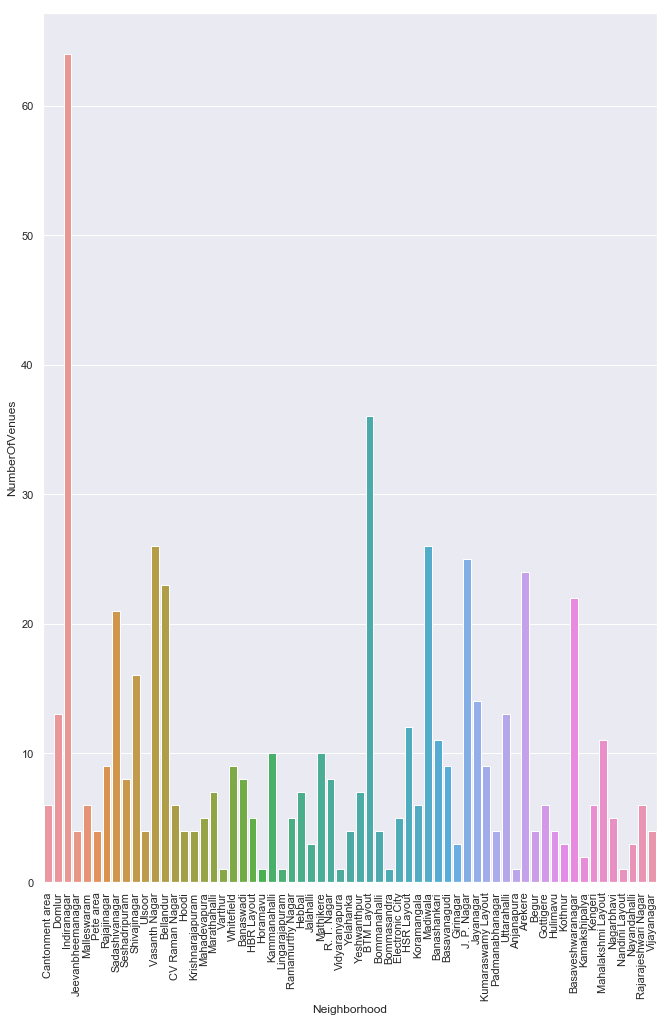

In [30]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

## Exploring the neighborhood of Whitefield

In [31]:
bangalore_venues[bangalore_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
231,Whitefield,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
232,Whitefield,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
233,Whitefield,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
234,Whitefield,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
235,Whitefield,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
236,Whitefield,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
237,Whitefield,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
238,Whitefield,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café
239,Whitefield,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


## Creating a common scale for comparing neighborhoods

In [32]:
bangalore_venues_onehot = pd.get_dummies(bangalore_venues[['Venue Category']])
bangalore_venues_onehot

,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bagel Shop,Venue Category_Bakery,...,Venue Category_Tex-Mex Restaurant,Venue Category_Thai Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
bangalore_venues_onehot['Neighborhood'] = bangalore_venues['Neighborhood']
bangalore_venues_grouped = bangalore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bagel Shop,...,Venue Category_Tex-Mex Restaurant,Venue Category_Thai Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,Arekere,0.00,0.00,0.000000,0.000000,0.041667,0.0,0.000000,0.041667,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,BTM Layout,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.027778,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.055556,0.000000,0.000000,0.000000
3,Banashankari,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
4,Banaswadi,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.125000,0.000000,0.000000,0.000000
5,Basavanagudi,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
6,Basaveshwaranagar,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
7,Begur,0.25,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,Bellandur,0.00,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
9,Bommanahalli,0.00,0.00,0.000000,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000


In [34]:
number_of_top_venues = 5

In [35]:
for hood in bangalore_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = bangalore_venues_grouped[bangalore_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Anjanapura ---------
                                          Venue  Frequency
0                            Venue Category_ATM        1.0
1                    Venue Category_Pizza Place        0.0
2          Venue Category_Performing Arts Venue        0.0
3                           Venue Category_Park        0.0
4  Venue Category_Paper / Office Supplies Store        0.0


--------- Arekere ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.17
1  Venue Category_Sporting Goods Shop       0.17
2          Venue Category_Pizza Place       0.08
3       Venue Category_Breakfast Spot       0.04
4     Venue Category_Department Store       0.04


--------- BTM Layout ---------
                                          Venue  Frequency
0              Venue Category_Indian Restaurant       0.19
1                 Venue Category_Ice Cream Shop       0.08
2             Venue Category_Chinese Restaurant       0.08
3                    V

                                 Venue  Frequency
0     Venue Category_Indian Restaurant       0.28
1  Venue Category_Fast Food Restaurant       0.08
2    Venue Category_Chinese Restaurant       0.08
3           Venue Category_Snack Place       0.04
4     Venue Category_Andhra Restaurant       0.04


--------- Jalahalli ---------
                                 Venue  Frequency
0            Venue Category_Playground       0.33
1     Venue Category_Convenience Store       0.33
2   Venue Category_Indie Movie Theater       0.33
3  Venue Category_Karnataka Restaurant       0.00
4         Venue Category_Movie Theater       0.00


--------- Jayanagar ---------
                              Venue  Frequency
0  Venue Category_Indian Restaurant       0.36
1   Venue Category_Department Store       0.07
2               Venue Category_Café       0.07
3          Venue Category_Multiplex       0.07
4       Venue Category_Cupcake Shop       0.07


--------- Jeevanbheemanagar ---------
              

                                      Venue  Frequency
0                Venue Category_Pizza Place       0.17
1  Venue Category_Indian Chinese Restaurant       0.17
2             Venue Category_Ice Cream Shop       0.17
3                       Venue Category_Café       0.17
4                 Venue Category_Food Court       0.17


--------- Ramamurthy Nagar ---------
                                    Venue  Frequency
0                      Venue Category_ATM        0.2
1              Venue Category_IT Services        0.2
2              Venue Category_Supermarket        0.2
3  Venue Category_South Indian Restaurant        0.2
4                   Venue Category_Bakery        0.2


--------- Sadashivanagar ---------
                              Venue  Frequency
0        Venue Category_Coffee Shop       0.14
1  Venue Category_Indian Restaurant       0.10
2               Venue Category_Café       0.10
3     Venue Category_Ice Cream Shop       0.10
4   Venue Category_Department Store      

In [36]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [37]:

number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_venues_grouped['Neighborhood']

for ind in np.arange(bangalore_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anjanapura,Venue Category_ATM,Venue Category_Department Store,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Fish & Chips Shop
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,Venue Category_Business Service
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Snack Place,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Sandwich Place,Venue Category_Coffee Shop,Venue Category_Vegetarian / Vegan Restaurant
3,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Fast Food Restaurant,Venue Category_Shoe Store,Venue Category_Men's Store,Venue Category_Park
4,Banaswadi,Venue Category_Indian Restaurant,Venue Category_Bakery,Venue Category_Grocery Store,Venue Category_Market,Venue Category_Café,Venue Category_Pharmacy,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Dim Sum Restaurant,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant


In [38]:
neighborhoods_venues_sorted.shape

(63, 11)

## Determine optimal k value for k means clustering
### Using the elbow method

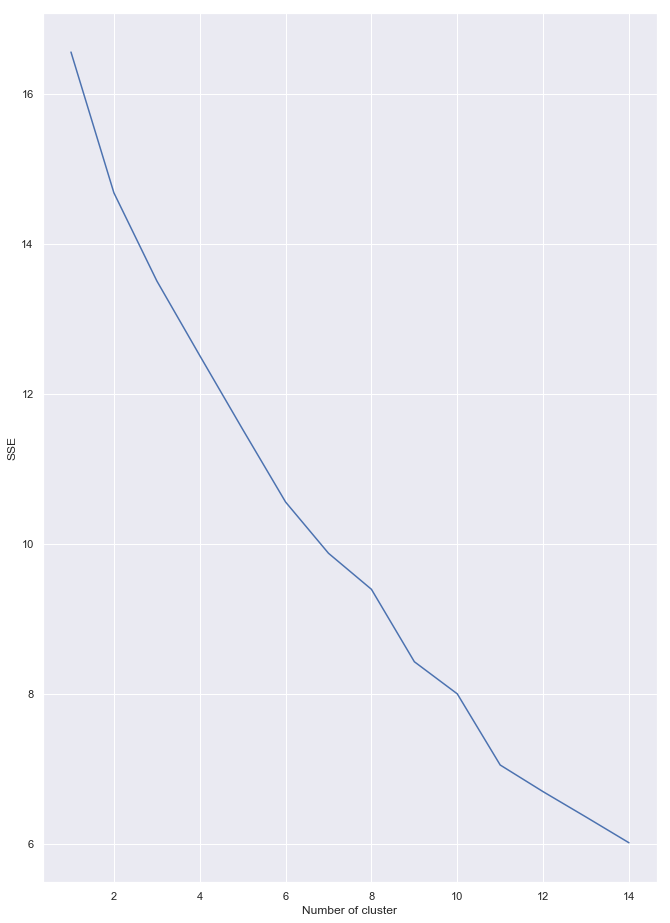

In [39]:

sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))
    bangalore_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Optimal k value = 5 

In [40]:
kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(bangalore_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [41]:
bangalore_venues_grouped['Cluster'] = kmeans.labels_
bangalore_venues_grouped.groupby('Cluster')['Neighborhood'].count()


Cluster
0     6
1    26
2     4
3     8
4    19
Name: Neighborhood, dtype: int64

In [42]:
bangalore_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Andhra Restaurant', 'Venue Category_Art Museum',
       'Venue Category_Asian Restaurant', 'Venue Category_Athletics & Sports',
       'Venue Category_Auto Garage', 'Venue Category_BBQ Joint',
       'Venue Category_Badminton Court', 'Venue Category_Bagel Shop',
       ...
       'Venue Category_Thai Restaurant', 'Venue Category_Toll Plaza',
       'Venue Category_Toy / Game Store', 'Venue Category_Train Station',
       'Venue Category_Udupi Restaurant',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Vietnamese Restaurant', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=133)

In [43]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues_grouped,on='Neighborhood')
neighborhoods_venues_sorted.head(4)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Thai Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,Venue Category_ATM,Venue Category_Department Store,Venue Category_Dim Sum Restaurant,Venue Category_Diner,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Falafel Restaurant,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
2,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,Venue Category_Snack Place,Venue Category_Bakery,Venue Category_Fast Food Restaurant,Venue Category_Pizza Place,Venue Category_Sandwich Place,Venue Category_Coffee Shop,...,0.0,0.0,0.0,0.0,0.0,0.055556,0.0,0.0,0.0,1
3,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Fast Food Restaurant,Venue Category_Shoe Store,Venue Category_Men's Store,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1


In [44]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(bangalore_venues,on='Neighborhood')

In [45]:
# create map
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)

In [46]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [47]:
map_clusters

## Taking user input and finding similar locations
### using population and income to create recommendations

In [48]:
income.head()

,Borough,Neighborhoods,AverageIncome
0,Central,Cantonment area,18944.099792
1,Central,Domlur,56837.022198
2,Central,Indiranagar,41991.817435
3,Central,Jeevanbheemanagar,6667.447632
4,Central,Malleswaram,53270.063892


In [49]:
population.head()

,Borough,Neighborhoods,Population
0,Central,Cantonment area,866377
1,Central,Domlur,743186
2,Central,Indiranagar,474289
3,Central,Jeevanbheemanagar,527874
4,Central,Malleswaram,893629


In [68]:

population['Normalized_population'] = population['Population']/population['Population'].max(axis=0)
population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Central,Cantonment area,866377,0.880810
1,Central,Domlur,743186,0.755567
2,Central,Indiranagar,474289,0.482190
3,Central,Jeevanbheemanagar,527874,0.536668
4,Central,Malleswaram,893629,0.908516


In [69]:
income['Normalized_income'] = income['AverageIncome']/income['AverageIncome'].max(axis=0)
income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Central,Cantonment area,18944.099792,0.293051
1,Central,Domlur,56837.022198,0.879225
2,Central,Indiranagar,41991.817435,0.649581
3,Central,Jeevanbheemanagar,6667.447632,0.103140
4,Central,Malleswaram,53270.063892,0.824047


In [70]:
bangalore_venues_grouped.head(1)

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bagel Shop,...,Venue Category_Thai Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Anjanapura,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [72]:
bangalore_veg = bangalore_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
bangalore_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Andhra Restaurant,Venue Category_Art Museum,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Auto Garage,Venue Category_BBQ Joint,Venue Category_Badminton Court,Venue Category_Bagel Shop,...,Venue Category_Tex-Mex Restaurant,Venue Category_Thai Restaurant,Venue Category_Toll Plaza,Venue Category_Toy / Game Store,Venue Category_Train Station,Venue Category_Udupi Restaurant,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Vietnamese Restaurant,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Anjanapura,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arekere,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,BTM Layout,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,0,0,0
3,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Banaswadi,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
bangalore_veg['Venue Category_Vegetarian / Vegan Restaurant']


0     0
1     0
2     2
3     0
4     1
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    1
25    0
26    0
27    0
28    0
29    0
     ..
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    1
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    1
58    0
59    0
60    0
61    0
62    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 63, dtype: uint8

In [74]:
bangalore_veg = bangalore_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]
bangalore_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)
bangalore_veg.head()


,Neighborhood,NumberOfVegRestaurants
0,Anjanapura,0
1,Arekere,0
2,BTM Layout,2
3,Banashankari,0
4,Banaswadi,1


In [75]:
bangalore_veg['NumberOfNonVeganrestaurants'] = 1-(bangalore_veg['NumberOfVegRestaurants']/bangalore_veg['NumberOfVegRestaurants'].max(axis=0))
bangalore_veg.head(10)


,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Anjanapura,0,1.0
1,Arekere,0,1.0
2,BTM Layout,2,0.0
3,Banashankari,0,1.0
4,Banaswadi,1,0.5
5,Basavanagudi,0,1.0
6,Basaveshwaranagar,0,1.0
7,Begur,0,1.0
8,Bellandur,0,1.0
9,Bommanahalli,0,1.0


In [76]:
bangalore_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

## Target neighborhood creation

In [77]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']
target_cluster_dataframe.reset_index()


,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,570,Whitefield,Venue Category_Café,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Yoga Studio,...,0.0,0.0,1,Eastern,12.9698,77.7499,Herbs and Spices,12.968145,77.750862,Eastern European Restaurant
1,571,Whitefield,Venue Category_Café,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Yoga Studio,...,0.0,0.0,1,Eastern,12.9698,77.7499,Golds Gym,12.972217,77.750529,Gym / Fitness Center
2,572,Whitefield,Venue Category_Café,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Yoga Studio,...,0.0,0.0,1,Eastern,12.9698,77.7499,Chef Baker's,12.969730,77.751302,Bakery
3,573,Whitefield,Venue Category_Café,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Yoga Studio,...,0.0,0.0,1,Eastern,12.9698,77.7499,Royal Orchid Suites,12.966774,77.751262,Hotel
4,574,Whitefield,Venue Category_Café,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Yoga Studio,...,0.0,0.0,1,Eastern,12.9698,77.7499,The river side bar and kitchen,12.967298,77.749614,Hotel Bar
5,575,Whitefield,Venue Category_Café,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Yoga Studio,...,0.0,0.0,1,Eastern,12.9698,77.7499,Cheenavala,12.966435,77.749368,Kerala Restaurant
6,576,Whitefield,Venue Category_Café,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Yoga Studio,...,0.0,0.0,1,Eastern,12.9698,77.7499,Glen's Bakehouse,12.967490,77.749565,Bakery
7,577,Whitefield,Venue Category_Café,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Yoga Studio,...,0.0,0.0,1,Eastern,12.9698,77.7499,Calvin's,12.973117,77.749514,Café
8,578,Whitefield,Venue Category_Café,Venue Category_Bakery,Venue Category_Gym / Fitness Center,Venue Category_Hotel Bar,Venue Category_Hotel,Venue Category_Kerala Restaurant,Venue Category_Eastern European Restaurant,Venue Category_Yoga Studio,...,0.0,0.0,1,Eastern,12.9698,77.7499,refresh,12.965621,77.749234,Café


In [78]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']
target_cluster

1

In [79]:
print("The target cluster is : ",target_cluster)


The target cluster is :  1


In [80]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
5,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place


In [81]:

print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

There are 325 neighborhoods which has similar characteristics to Whitefield.


In [82]:

possible_neighborhoods.reset_index().head()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop
1,2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Kababis,12.889605,77.597557,Indian Restaurant
2,3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Guru Garden,12.891196,77.597979,Indian Restaurant
3,4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant
4,5,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,...,0.0,0.0,1,SouthernSuburbs,12.8875,77.597,Pizza Hut,12.889420,77.597494,Pizza Place


In [83]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)


In [84]:
possible_neighborhoods = possible_neighborhoods.merge(population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(bangalore_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

In [85]:
possible_neighborhoods.head()


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,Decathlon Sports India Pvt Ltd,12.887513,77.597712,Sporting Goods Shop,138760,0.141072,29378.716626,0.454466,0,1.0
1,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,Kababis,12.889605,77.597557,Indian Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
2,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,Guru Garden,12.891196,77.597979,Indian Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
3,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,Zhangs Dynasty,12.889923,77.597804,Chinese Restaurant,138760,0.141072,29378.716626,0.454466,0,1.0
4,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,Venue Category_Gym / Fitness Center,Venue Category_Liquor Store,Venue Category_Fast Food Restaurant,Venue Category_Mughlai Restaurant,Venue Category_Department Store,Venue Category_Chinese Restaurant,...,Pizza Hut,12.889420,77.597494,Pizza Place,138760,0.141072,29378.716626,0.454466,0,1.0


In [86]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

In [87]:
recommended_neighborhoods.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Latitude,Venue Longitude,Venue Category,Population,Normalized_population,AverageIncome,Normalized_income,NumberOfVegRestaurants,NumberOfNonVeganrestaurants,Ranking
0,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Fast Food Restaurant,Venue Category_Shoe Store,Venue Category_Men's Store,...,12.926094,77.550367,Indian Restaurant,810407,0.823908,57524.209528,0.889855,0,1.0,0.823403
1,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Fast Food Restaurant,Venue Category_Shoe Store,Venue Category_Men's Store,...,12.926221,77.550582,Fast Food Restaurant,810407,0.823908,57524.209528,0.889855,0,1.0,0.823403
2,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Fast Food Restaurant,Venue Category_Shoe Store,Venue Category_Men's Store,...,12.926891,77.551068,Clothing Store,810407,0.823908,57524.209528,0.889855,0,1.0,0.823403
3,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Fast Food Restaurant,Venue Category_Shoe Store,Venue Category_Men's Store,...,12.924645,77.551057,Men's Store,810407,0.823908,57524.209528,0.889855,0,1.0,0.823403
4,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,Venue Category_Pizza Place,Venue Category_North Indian Restaurant,Venue Category_Clothing Store,Venue Category_Fast Food Restaurant,Venue Category_Shoe Store,Venue Category_Men's Store,...,12.926899,77.550973,Shoe Store,810407,0.823908,57524.209528,0.889855,0,1.0,0.823403


In [88]:

top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

In [89]:
top3_df = pd.DataFrame(top3).reset_index()


In [90]:
top3_df.head(3)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Ranking
0,Arekere,Venue Category_Indian Restaurant,Venue Category_Sporting Goods Shop,Venue Category_Pizza Place,[0.32959888840700646]
1,BTM Layout,Venue Category_Indian Restaurant,Venue Category_Ice Cream Shop,Venue Category_Chinese Restaurant,[0.6918117751640322]
2,Banashankari,Venue Category_Café,Venue Category_Indian Restaurant,Venue Category_Miscellaneous Shop,[0.8234029969357849]


### Based on the analysis above, the three neighborhoods of "Arekere", " BTM Layout", and "Banashankari" are the top 3 localities to fin similar vegetarian food to the neighborhood of Whitefield.